# Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# X_train = pd.read_csv("X_train.csv")
# X_test = pd.read_csv("X_test.csv")
# y_train = pd.read_csv("y_train.csv")
# y_test = pd.read_csv("y_test.csv")

X_train = pd.read_csv("X_train_c.csv")
X_test = pd.read_csv("X_test_c.csv")
y_train = pd.read_csv("y_train_c.csv")
y_test = pd.read_csv("y_test_c.csv")

## 1. Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

f1 = []
max_depth = []
for x in range(10):
    i = x + 1
    rnd_clf = RandomForestClassifier(
        n_estimators = 500, # 500 trees
        max_depth = i,
        n_jobs = -1
    )
    
    score_f1 = cross_val_score(rnd_clf, X_train, y_train, cv = 5, scoring = "f1_macro")

    print(score_f1.mean())
    
    f1.append(score_f1.mean())
    max_depth.append(i)

0.286390040449964
0.417677035965609
0.5243086949793121
0.5522290087230539
0.5799234696291341
0.6014132695867056
0.6141932659524091
0.6306374209425541
0.6445050148601027
0.6567553047897515


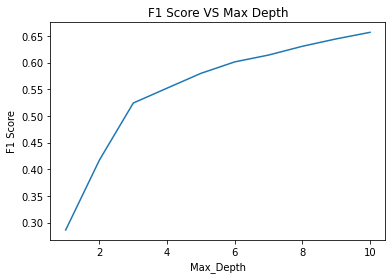

In [4]:
# plt.plot(max_depth, precision, label = "Precision")
# plt.plot(max_depth, recall, label = "recall")
plt.plot(max_depth, f1)
plt.title("F1 Score VS Max Depth")
plt.xlabel("Max_Depth")
plt.ylabel("F1 Score")
plt.show()

In [1]:
# score_precision = precision_score(y_test, y_pred, average = "macro")
# score_recall = recall_score(y_test, y_pred, average = "macro")

# print("Precision = ", score_precision)
# print("Recall = ", score_recall)

In [2]:
# true_count = 0
# y_test = np.array(y_test)
# for i,x in enumerate(y_pred):
#     # print(i,x,y_test[i])
#     if x == y_test[i]:
#         # print("ok")
#         true_count += 1
    
# print("Persentase benar = {} %".format((true_count/len(y_pred))*100) )

In [3]:
# info = zip(X_train, rnd_clf.feature_importances_)

# for name, score in info:
#     print(name,score)


## 1. Grid Search parameter terbaik di random forest

In [4]:
# grid search
# n estimator =  tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV

rnd_clf = RandomForestClassifier(n_jobs = -1)

param_grid = [
    {'n_estimators':[100, 300, 500, 700], 'max_depth':[10,12,14,16,18]}
]

grid_search = GridSearchCV(rnd_clf, param_grid, cv = 5, scoring = "f1_macro")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'max_depth': [10, 12, 14, 16, 18],
                          'n_estimators': [100, 300, 500, 700]}],
             scoring='f1_macro')

In [5]:
grid_search.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [6]:
grid_search.cv_results_["mean_test_score"].max()

0.6915573624055844

## 2. Training dengan parameter grid search

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

n_estimators = 100
max_depth = 16

rnd_clf = RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = max_depth,
        n_jobs = -1
)
    
rnd_clf.fit(X_train, y_train)

y_train_pred = rnd_clf.predict(X_val)

precision_metric = precision_score(y_val, y_train_pred, average = "macro")
recall_metric = recall_score(y_val, y_train_pred, average = "macro")
f1_metric = f1_score(y_val, y_train_pred, average = "macro")
accuracy_metric = accuracy_score(y_val, y_train_pred)

print("Precision ",precision_metric)
print("Recall ", recall_metric)
print("F1 ", f1_metric)
print("Accuracy ",accuracy_metric)

Precision  0.7285773126083009
Recall  0.6860661875799218
F1  0.7028790164898001
Accuracy  0.7136150234741784
